In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [478]:
data = pd.read_csv('bank.csv')

In [479]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [480]:
data.shape

(10000, 14)

<span style="color:darkblue">There are ten thousand rows and 14 columns 

In [481]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<span style="color:darkblue">RowNumber and CustomerID will not be used for modeling. Lower 25% of the people have zero balance. EstimatedSalary has a very wide range with a minimum of 11 to ~200000. 

In [482]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<span style="color:darkblue">No Null data.

In [483]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [484]:
df = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

<span style="color:darkblue">Dropping the columns that are not useful for modeling purposes.

In [485]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<span style="color:darkblue">Geography and Gender are of string datatype and needs to be converted using one-hot encoding. 

In [486]:
categorical = ['HasCrCard', 'Gender', 'Geography', 'IsActiveMember', 'Age', 'NumOfProducts', 'Tenure']
continuous = ['CreditScore', 'Balance', 'EstimatedSalary']

<span style="color:darkblue">Creating a list of continuous and categorical variables to make it easy for separate visualizations. 

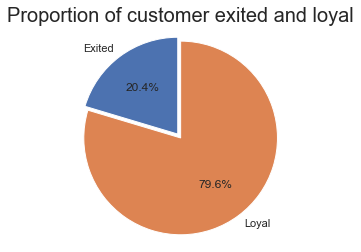

In [487]:
labels = 'Exited', 'Loyal'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels,startangle=90,  autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Proportion of customer exited and loyal", size = 20)
plt.show()

<span style="color:darkblue">There are close to 80% loyal customer and 20% have left the bank.

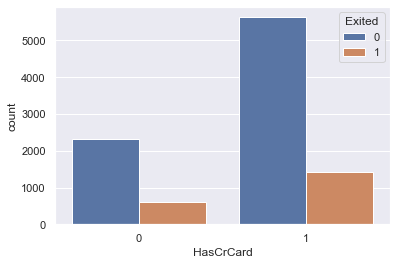

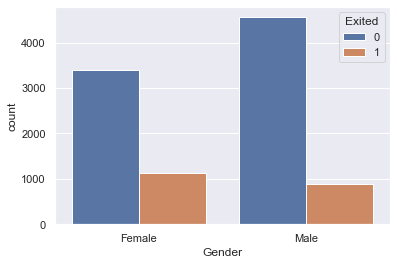

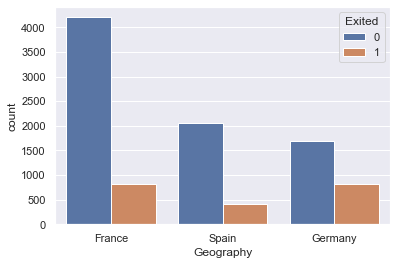

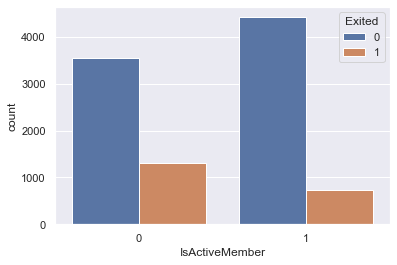

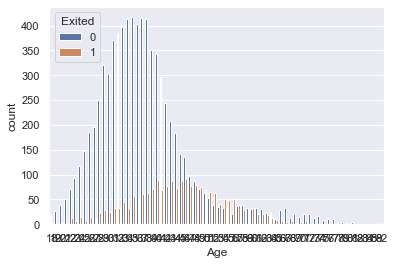

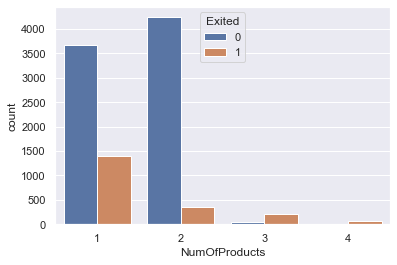

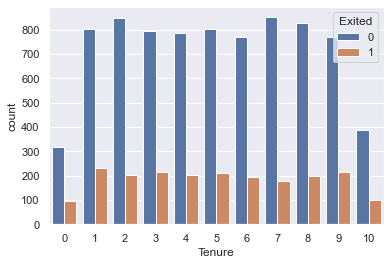

In [488]:
for i in categorical:
    sns.countplot (df[i], hue = df['Exited'] );
    plt.show();

In [489]:
df.groupby(by='Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


<span style="color:darkblue">Estimating percentage of male and female that have left the bank.

In [490]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [491]:
df_Male = df [df['Gender'] == "Male"]
df_Female = df [df['Gender'] == "Female"]

In [492]:
df_Male[df['Exited'] == 1].shape[0] / df_Male.shape[0] * 100

16.455928165658786

In [493]:
df_Female[df['Exited']==1].shape[0]/df_Female.shape[0] * 100

25.071538630860662

<span style="color:darkblue"> Few observations here : 1) Majority of people who have exited the bank had credit cards 2) We have more male customers than females. Number of female customers exiting is relatively higher compared to male. 3) Around half of the entire data is from France. 4) Churn rate is higher in Germany. 5) Inactive members have higher tendency to become churn members. Logically it makes sense as they are not using the bank products. 6) Most customers use one or two kinds of products and people with more than two products have higher churn rate. 

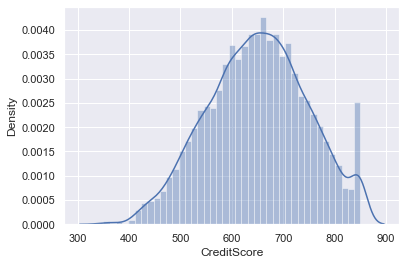

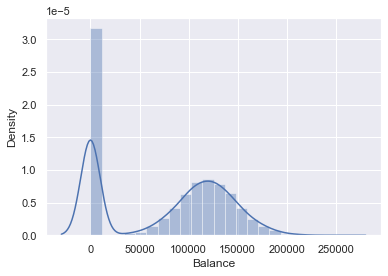

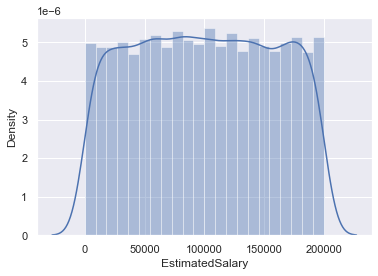

In [494]:
for i in continuous:
    sns.distplot(a = df[i], kde=True)
    plt.show()

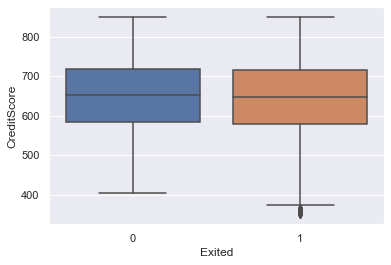

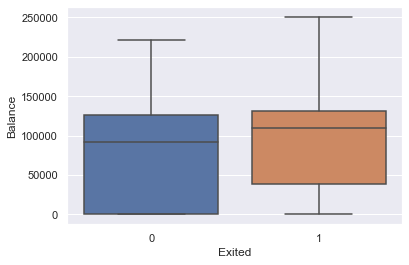

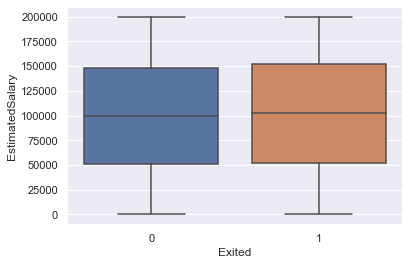

In [495]:
for i in continuous:
    sns.boxplot(x = 'Exited', y = df[i], data = df)
    plt.show()

In [496]:
df [df['EstimatedSalary'] < 100]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
5548,710,France,Male,38,2,0.00,2,1,0,96.27,0
9010,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
9647,625,France,Male,31,5,0.00,2,0,1,90.07,0


In [497]:
df [df['EstimatedSalary'] > 199900]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3580,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8926,620,France,Male,28,8,0.00,2,1,1,199909.32,0
9096,569,France,Male,37,9,178755.84,1,1,0,199929.17,0


In [498]:
df [df['Balance'] > 220000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3588,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


<span style="color:darkblue"> There are a lot of people with zero balance. Estimated salary and Balance does not correlate with each other. A person with an estimated salary of 11.58 or 91.75 have 120000+ Balance in the account which is a bit unbelievable, <span style="color:red">need to verify the data. 
    
<span style="color:darkblue"> On the contrary, a person with 199992 EstimatedSalary has a balance of zero. 

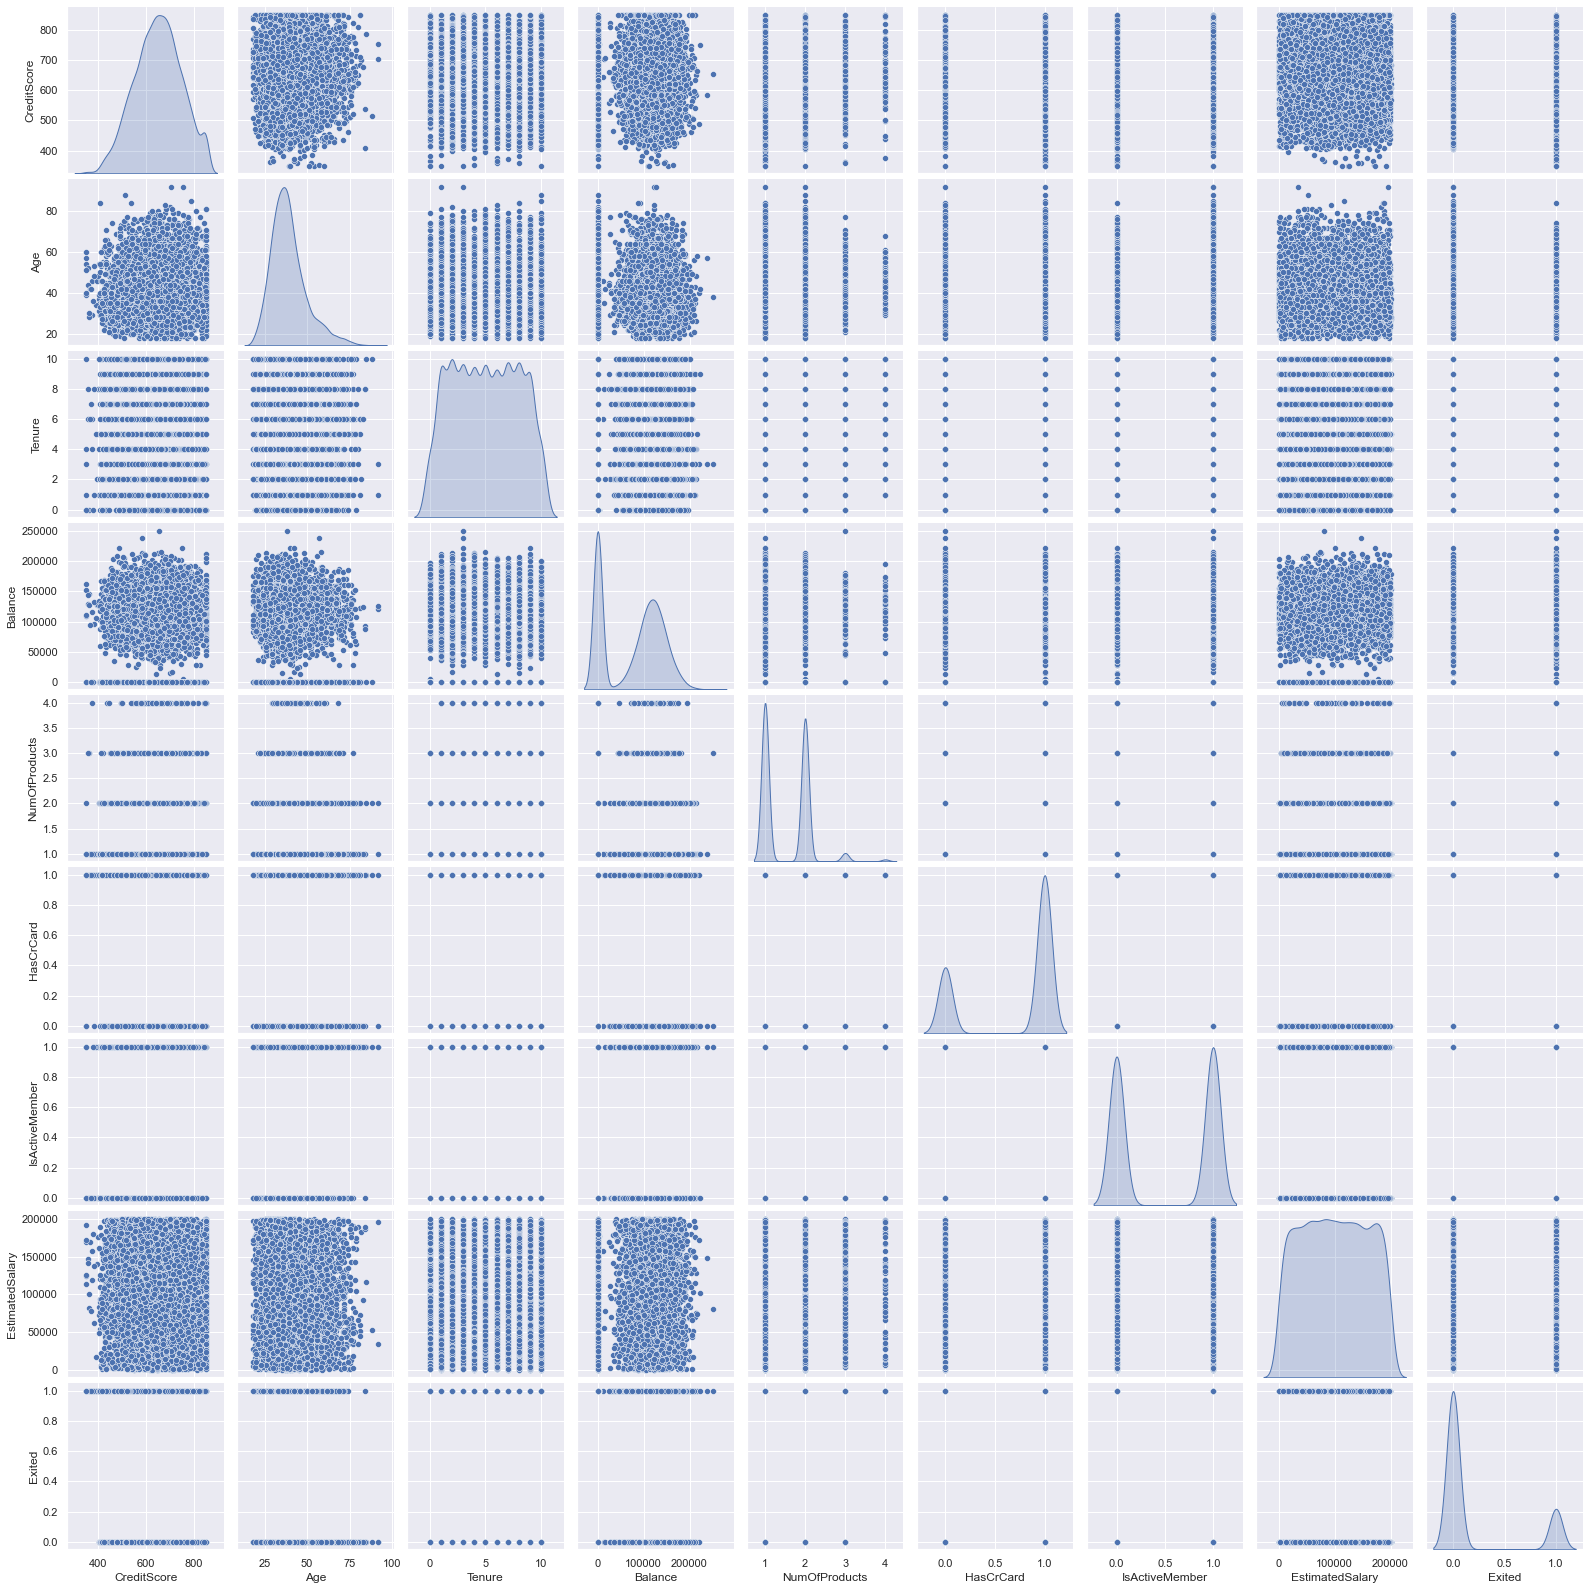

In [499]:
sns.pairplot(df,diag_kind='kde');

<span style="color:darkblue"> There are no straighforward relationships between continuous variables. We don't see strong correlations between any two variables. 

In [500]:
df2 = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)
df2.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


<span style="color:darkblue"> Converting Geography and Gender to categorical variables so that it can be used for modeling. 

In [501]:
X = df2.drop(['Exited'], axis=1)
y = df2.Exited
print(X.shape)

(10000, 11)


In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

In [503]:
print("Training churn customers    : {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training loyal customer     : {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test churn customers        : {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test loyal customer         : {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Training churn customers    : 1426 (20.37%)
Training loyal customer     : 5574 (79.63%)

Test churn customers        : 611 (20.37%)
Test loyal customer         : 2389 (79.63%)


<span style="color:darkblue">The split is proportional in both test and training data.

In [504]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<span style="color:darkblue"> Normalizing/scaling the data. StandardScaler is used to fit the training data and the same object is used for transforming the test data.

In [505]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

In [506]:
model = Sequential()

In [507]:
model.add(Dense(50, input_shape = (11,), activation = 'relu'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(1,activation = 'sigmoid'))

In [508]:
sgd = optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=sgd, loss='binary_crossentropy', metrics = ['accuracy'])

In [509]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_66 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 26        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [510]:
model.fit(X_train, y_train.values, batch_size = 50, validation_split=0.2, epochs = 100, verbose=2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/100
5600/5600 - 1s - loss: 0.5678 - accuracy: 0.7359 - val_loss: 0.5196 - val_accuracy: 0.7871
Epoch 2/100
5600/5600 - 0s - loss: 0.4920 - accuracy: 0.7986 - val_loss: 0.4948 - val_accuracy: 0.7871
Epoch 3/100
5600/5600 - 0s - loss: 0.4738 - accuracy: 0.7986 - val_loss: 0.4812 - val_accuracy: 0.7871
Epoch 4/100
5600/5600 - 0s - loss: 0.4620 - accuracy: 0.7986 - val_loss: 0.4707 - val_accuracy: 0.7879
Epoch 5/100
5600/5600 - 0s - loss: 0.4529 - accuracy: 0.7991 - val_loss: 0.4622 - val_accuracy: 0.7900
Epoch 6/100
5600/5600 - 0s - loss: 0.4457 - accuracy: 0.8012 - val_loss: 0.4552 - val_accuracy: 0.7900
Epoch 7/100
5600/5600 - 0s - loss: 0.4398 - accuracy: 0.8039 - val_loss: 0.4493 - val_accuracy: 0.7957
Epoch 8/100
5600/5600 - 0s - loss: 0.4350 - accuracy: 0.8095 - val_loss: 0.4443 - val_accuracy: 0.8007
Epoch 9/100
5600/5600 - 0s - loss: 0.4309 - accuracy: 0.8125 - val_loss: 0.4403 - val_accuracy: 0.8029
Epoch 10/100
5600/5600 - 

Epoch 80/100
5600/5600 - 0s - loss: 0.3340 - accuracy: 0.8641 - val_loss: 0.3578 - val_accuracy: 0.8564
Epoch 81/100
5600/5600 - 0s - loss: 0.3335 - accuracy: 0.8643 - val_loss: 0.3570 - val_accuracy: 0.8521
Epoch 82/100
5600/5600 - 0s - loss: 0.3333 - accuracy: 0.8655 - val_loss: 0.3573 - val_accuracy: 0.8571
Epoch 83/100
5600/5600 - 0s - loss: 0.3327 - accuracy: 0.8639 - val_loss: 0.3570 - val_accuracy: 0.8557
Epoch 84/100
5600/5600 - 0s - loss: 0.3323 - accuracy: 0.8662 - val_loss: 0.3564 - val_accuracy: 0.8543
Epoch 85/100
5600/5600 - 0s - loss: 0.3322 - accuracy: 0.8643 - val_loss: 0.3572 - val_accuracy: 0.8564
Epoch 86/100
5600/5600 - 0s - loss: 0.3317 - accuracy: 0.8650 - val_loss: 0.3565 - val_accuracy: 0.8543
Epoch 87/100
5600/5600 - 0s - loss: 0.3314 - accuracy: 0.8655 - val_loss: 0.3565 - val_accuracy: 0.8543
Epoch 88/100
5600/5600 - 0s - loss: 0.3311 - accuracy: 0.8652 - val_loss: 0.3568 - val_accuracy: 0.8543
Epoch 89/100
5600/5600 - 0s - loss: 0.3307 - accuracy: 0.8652 - 

<span style="color:darkblue"> Overall, we can see that the loss decreases and accuracy increases after each epoch. 
    
<span style="color:darkblue">I have tested tuning several parameters: changing learning rate, adding more neurons, adding additional hidden layers, changing the activation functions for each hidden layers, changing the optimizer to Adam (and others). Most of them resulted in increasing accuracy of training data and decreasing the val_accuracy for validation set, which is a clear indication of <span style="color:red">over-fitting. <span style="color:darkblue">Hence after several trial and error, the current parameters are chosen where the loss and val_loss both decreases and accuracy/val_accuracy increases. 

In [511]:
results = model.evaluate(X_test, y_test.values, verbose=2)

3000/1 - 0s - loss: 0.3340 - accuracy: 0.8580


In [512]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.34607800205548606, 0.858]


In [513]:
y_predict = model.predict(X_test)
y_predict_original = model.predict_classes(X_test)

In [514]:
def draw_cm (actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm,annot = True, fmt='0.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix



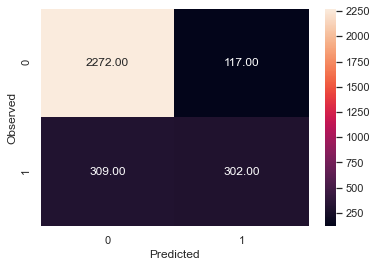

None


In [515]:
print ('Confusion Matrix')
print()
print(draw_cm(y_test, y_predict_original))

In [516]:
Recall_original = recall_score(y_test, y_predict_original)
Precision_original = precision_score(y_test, y_predict_original)
F1_score_original = f1_score(y_test, y_predict_original)
Accuracy_original = accuracy_score (y_test, y_predict_original)
ROC_original = roc_auc_score(y_test,y_predict_original)

In [517]:
Metrics_tab = pd.DataFrame([Recall_original, Precision_original, F1_score_original,Accuracy_original, 
                            ROC_original], 
                           index = ['Recall','Precision', 'F1_score', 'Accuracy', 'ROC Auc Score'],
                           columns = ['Default Threshold'])
Metrics_tab

,Default Threshold
Recall,0.494272
Precision,0.720764
F1_score,0.586408
Accuracy,0.858000
ROC Auc Score,0.722649


<span style="color:darkblue"> Even though we know that the threshold for default classification is 0.5, let us use a 0.5 threshold and compare. 

In [518]:
threshold = 0.5
y_predict_point5_threshold = np.where (y_predict>=threshold,1,0)

Confusion Matrix



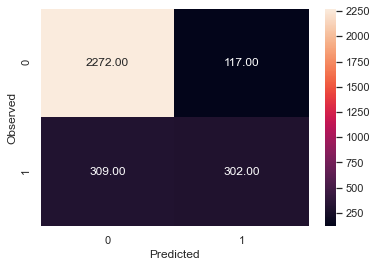

None


In [519]:
print ('Confusion Matrix')
print()
print(draw_cm(y_test, y_predict_point5_threshold))

In [520]:
Recall_point5_threshold = recall_score(y_test, y_predict_point5_threshold)
Precision_point5_threshold = precision_score(y_test, y_predict_point5_threshold)
F1_score_point5_threshold = f1_score(y_test, y_predict_point5_threshold)
Accuracy_point5_threshold  = accuracy_score (y_test, y_predict_point5_threshold)
ROC_point5_threshold = roc_auc_score(y_test,y_predict_point5_threshold)

In [521]:
Metrics_tab ['0.5 Threshold'] = [Recall_point5_threshold ,Precision_point5_threshold, F1_score_point5_threshold,
                                Accuracy_point5_threshold, ROC_point5_threshold ]
Metrics_tab

,Default Threshold,0.5 Threshold
Recall,0.494272,0.494272
Precision,0.720764,0.720764
F1_score,0.586408,0.586408
Accuracy,0.858000,0.858000
ROC Auc Score,0.722649,0.722649


<span style="color:darkblue"> This shows that the default threshold is 0.5. 

##### Testing thresholds 0.4 and 0.6 

In [522]:
threshold1 = 0.4
y_predict_point4_threshold = np.where (y_predict>=threshold1,1,0)

Confusion Matrix



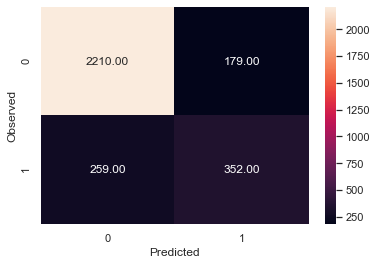

None


In [523]:
print ('Confusion Matrix')
print()
print(draw_cm(y_test, y_predict_point4_threshold))

In [524]:
Recall_point4_threshold = recall_score(y_test, y_predict_point4_threshold)
Precision_point4_threshold = precision_score(y_test, y_predict_point4_threshold)
F1_score_point4_threshold = f1_score(y_test, y_predict_point4_threshold)
Accuracy_point4_threshold  = accuracy_score (y_test, y_predict_point4_threshold)
ROC_point4_threshold = roc_auc_score(y_test,y_predict_point4_threshold)

In [525]:
Metrics_tab ['0.4 Threshold'] = [Recall_point4_threshold ,Precision_point4_threshold, F1_score_point4_threshold,
                                Accuracy_point4_threshold, ROC_point4_threshold ]
Metrics_tab

,Default Threshold,0.5 Threshold,0.4 Threshold
Recall,0.494272,0.494272,0.576105
Precision,0.720764,0.720764,0.662900
F1_score,0.586408,0.586408,0.616462
Accuracy,0.858000,0.858000,0.854000
ROC Auc Score,0.722649,0.722649,0.750589


In [526]:
threshold2 = 0.6
y_predict_point6_threshold = np.where (y_predict>=threshold2,1,0)

Confusion Matrix


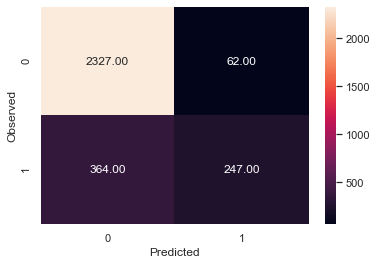

None


In [527]:
print('Confusion Matrix')
print (draw_cm(y_test, y_predict_point6_threshold))

In [528]:
Recall_point6_threshold = recall_score(y_test, y_predict_point6_threshold)
Precision_point6_threshold = precision_score(y_test, y_predict_point6_threshold)
F1_score_point6_threshold = f1_score(y_test, y_predict_point6_threshold)
Accuracy_point6_threshold  = accuracy_score (y_test, y_predict_point6_threshold)
ROC_point6_threshold = roc_auc_score(y_test,y_predict_point6_threshold)

In [529]:
Metrics_tab ['0.6 Threshold'] = [Recall_point6_threshold ,Precision_point6_threshold, F1_score_point6_threshold,
                                Accuracy_point6_threshold, ROC_point6_threshold ]
Metrics_tab

,Default Threshold,0.5 Threshold,0.4 Threshold,0.6 Threshold
Recall,0.494272,0.494272,0.576105,0.404255
Precision,0.720764,0.720764,0.662900,0.799353
F1_score,0.586408,0.586408,0.616462,0.536957
Accuracy,0.858000,0.858000,0.854000,0.858000
ROC Auc Score,0.722649,0.722649,0.750589,0.689152


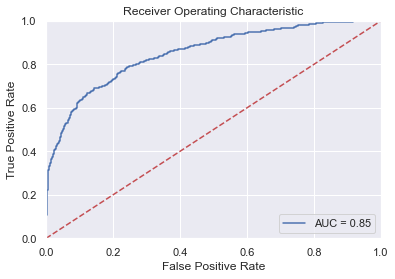

In [530]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

There is 85% chance, our algorithm is able to distinguish between the Positive and the Negative classes correctly

### <span style="color:green"> Final Observations: 
    

<span style="color:darkblue"> We can see the variation of metrics for different thresholds of 0.4, 0.5 and 0.6. 

<span style="color:darkblue">The bank is trying to determine whether a person will leave or not. 
Precision gives a good indication of total number of TP compared with TP and FP. The highest score we have is 0.86 when the threshold is 0.6. The threshold can be increased if the bank is only interested in the precision. 
    
<span style="color:darkblue"> In cases like this, the Bank may not care much about the FP. What matters the most is FN. Recall gives a good indication of both TP and FN. The highest is found in 0.4 threshold. 
    
<span style="color:darkblue"> Overall, this model is most stable and gives best metrics when the threshold is 0.5. 
A highest accuracy of 86%, a precision of 76% and a recall of ~50%. 
    
<span style="color:darkblue"> Using a Deep Neural Network model we are able to train, validate and predict the 'Exited' customers / churn for a bank. 
<span style="color:darkblue">The bank can use this information to target specific people and try to reduce the churn rate. 